In [2]:
#Adds higher directory to path to access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

import pandas as pd
import matplotlib.pyplot as plt

# Set the DataFram in pandas to show all columns and 1000 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)

2021-09-17 22:27:34.510473: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-17 22:27:34.510518: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [6]:
# Load data from arcGIS online
output = arcGIS_data_load('4e918d961ec146c0b345d888d33c1d57')

data = output['data0']
feature_service = output['feature_service']

In [22]:
# Subset data for desired year.
data.rename(columns={"SurveyDate": "Observation_Date"}, inplace=True)
sYear = input("Start Year? (YYYY)")
sub = year_subset(data,sYear)
sub.head()

Start Year? (YYYY) 2020

Analysis for 2020-10-01 07:00 UTC to 2021-10-01 07:00 UTC
Entries in Subset: 94


,OBJECTID,Observation_Date,Surveyor_1,Surveyor_2,Comments,GlobalID,SHAPE
34,37,2021-03-04 20:33:19,Mizael Seminatore,None,Point is duplicate of point 36.,8a0d9ef6-5631-4d35-aee1-92c26fb10ea9,"{""x"": 6184129.589945903, ""y"": 2036114.821438606, ""spatialReference"": {""wkid"": 102643, ""latestWkid"": 2227}}"
105,109,2020-11-12 18:01:17,Roger Stephens,None,Broken lower fence line. Cattle can get in.,b80b95aa-2fad-4d4a-b39b-d924911d0a1c,"{""x"": 6181740.111043048, ""y"": 2035516.453609533, ""spatialReference"": {""wkid"": 102643, ""latestWkid"": 2227}}"
106,110,2021-03-03 19:04:40,Brian Creeks,None,"Green fence post with concrete base has soil eroded around it, completely loose and so what unstable now.",137014e7-b69f-42c7-a727-676ac4105ac0,"{""x"": 6191228.108822984, ""y"": 2037978.7133582912, ""spatialReference"": {""wkid"": 102643, ""latestWkid"": 2227}}"
107,111,2021-03-03 19:45:23,Brian Creeks,None,"Wildlife friendly fence. Top wire was broken at green post, repaired by observer in the field but is still loose and may not hold against cattle, could warrant a more thorough repair.",e6018cab-66a4-41ff-84a1-4394276c79f6,"{""x"": 6190360.638523769, ""y"": 2038101.1091219548, ""spatialReference"": {""wkid"": 102643, ""latestWkid"": 2227}}"
108,112,2021-03-03 20:04:50,Brian Creeks,None,"Wildlife friendly fence. Top wire needs to be fixed here. Loose, unattached from posts. Biologist fixed at one post, but other post still needs to be re-attached to wire.",7538b896-0adf-4761-a739-8b63e175a027,"{""x"": 6189844.523390424, ""y"": 2038080.3865282089, ""spatialReference"": {""wkid"": 102643, ""latestWkid"": 2227}}"


In [11]:
# QAQC

In [17]:
#QAQC Check number of records matches on ArcGIS online
print('Subset \n# of rows:\n', sub.shape[0])
print('# of columns:\n',sub.shape[1])


Subset 
# of rows:
 104
# of columns:
 7


In [18]:
#Validate domains

validate_domains(feature_service)




Table/Layer:  SAC_Fence_Inspection_Point


No Mismatches Found


Table/Layer:  SAC_Fence_Inspection


No Mismatches Found


In [19]:
# QAQC Find white spaces
QAQC_whitespace(data, ['Comments'])

Name of Object ID Column:  ['OBJECTID']


Analysis for: GlobalID
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Surveyor_1
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Surveyor_2
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


In [20]:
data.columns

Index(['OBJECTID', 'Observation_Date', 'Surveyor_1', 'Surveyor_2', 'Comments',
       'GlobalID', 'SHAPE'],
      dtype='object')

/home/user/SAC/../ATS/QAQC.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plt_r,plt_c].set_xticklabels(r['DateString'], rotation='vertical')


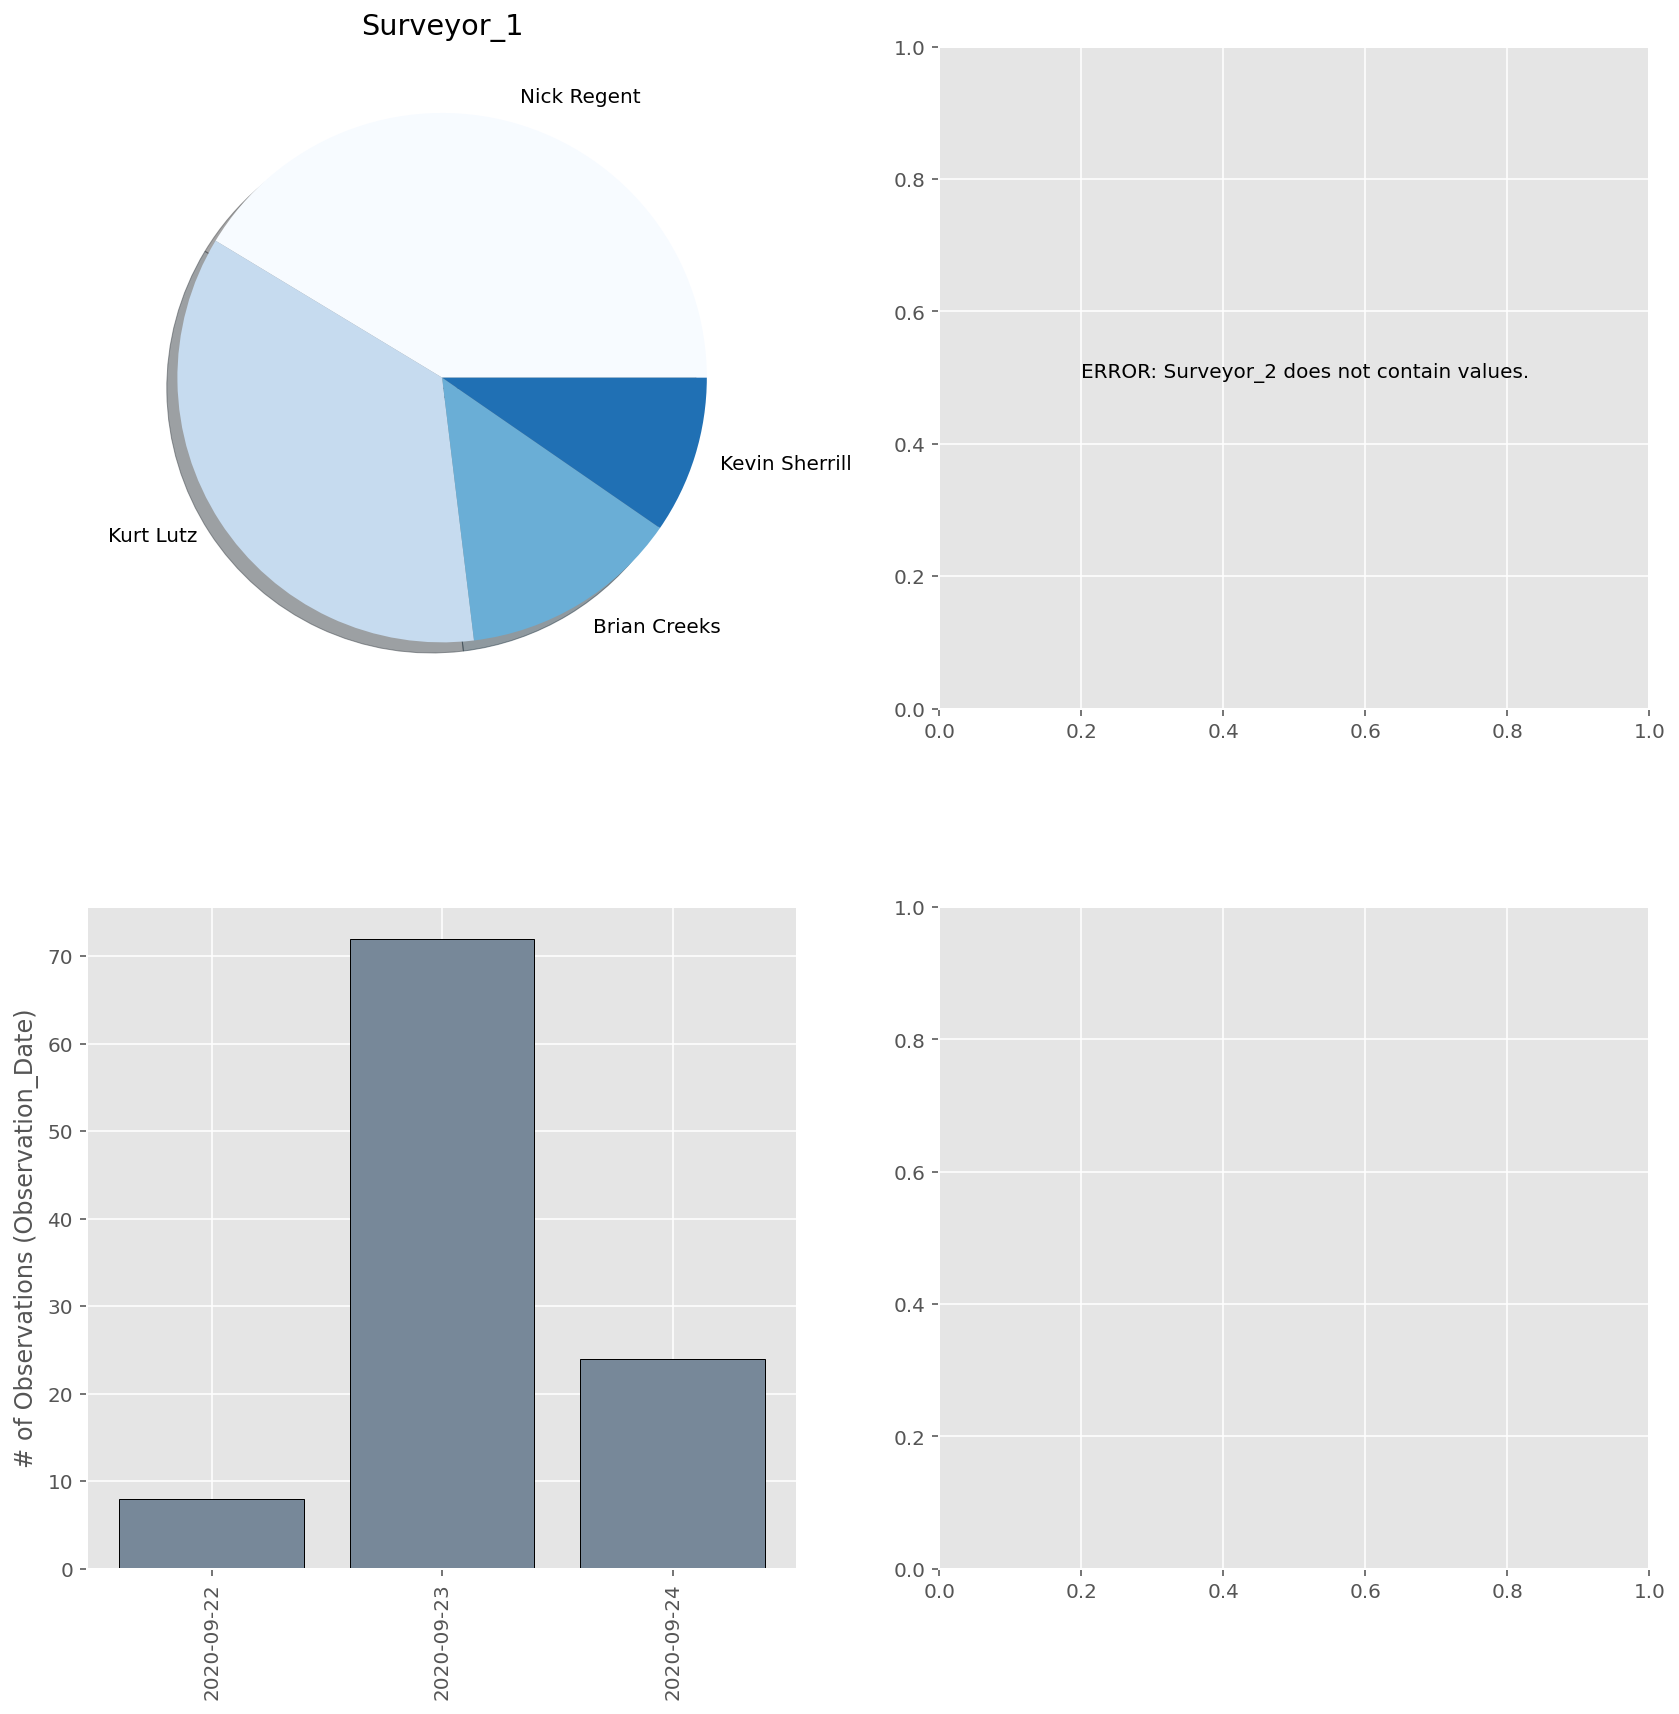

In [21]:
QAQC_plot(sub,['Surveyor_1','Surveyor_2','Observation_Date'])

In [24]:
QAQC_attachment_filenames(feature_service)


No attachments for layer/table SAC_Fence_Inspection_Point

No attachments for layer/table SAC_Fence_Inspection
